<a href="https://colab.research.google.com/github/rhehgus02/ESAA/blob/main/%EB%91%90%EC%9E%87_%ED%8C%90%EB%8B%A4%EC%8A%A4_%EC%9E%85%EB%AC%B8(2)_%EC%8B%9C%EA%B3%84%EC%97%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<02> 시계열 데이터**


## **1. datetime 오브젝트**

* `datetime` 라이브러리: 날짜와 시간을 처리하는 등의 다양한 기능을 제공하는 라이브러리
    * `date` 오브젝트: 날짜를 처리
    * `time` 오브젝트: 시간을 처리
    * `datetime` 오브젝트: 날짜와 시간을 모두 처리

---

#### **1-1. datetime 오브젝트 사용하기**

* `now`, `today` 메서드: 현재 시간 출력

* 장점: 시간 계산을 할 수 있음


In [1]:
from datetime import datetime

In [2]:
# now 메서드
now1 = datetime.now()
print(now1)

2023-04-04 12:55:36.767331


In [3]:
# today 메서드
now2 = datetime.today()
print(now2)

2023-04-04 12:55:38.305946


In [4]:
# datetime 오브젝트를 생성할 때 시간을 직접 입력하여 인자로 전달
t1 = datetime.now()
t2 = datetime(1970, 1, 1)
t3 = datetime(1970, 12, 12, 13, 24, 34)

print(t1)
print(t2)
print(t3)

2023-04-04 12:55:39.671844
1970-01-01 00:00:00
1970-12-12 13:24:34


In [5]:
# 두 datetime 오브젝트의 차이
diff1 = t1 - t2
print(diff1)
print(type(diff1))

19451 days, 12:55:39.671844
<class 'datetime.timedelta'>


In [6]:
diff2 = t2 - t1
print(diff2)
print(type(diff2))

-19452 days, 11:04:20.328156
<class 'datetime.timedelta'>


---

## **2. 사례별 시계열 데이터 계산하기**

#### **2-1. 테슬라 주식 데이터로 시간 계산하기**

In [7]:
# pandas-datareader 라이브러리를 이용하여 주식 데이터를 불러옴
!pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as pdr

tesla = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/tesla_stock_quandl.csv')

In [10]:
print(tesla.head())

         Date    Open    High     Low   Close    Volume  ExDividend  \
0  2018-03-27  304.00  304.27  277.18  279.18  13696168           0   
1  2018-03-26  307.34  307.59  291.36  304.18   8324639           0   
2  2018-03-23  311.25  311.61  300.45  301.54   6600538           0   
3  2018-03-22  313.89  318.82  308.18  309.10   4914307           0   
4  2018-03-21  310.25  322.44  310.19  316.53   5927881           0   

   SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose  AdjVolume  
0           1   304.00   304.27  277.18    279.18   13696168  
1           1   307.34   307.59  291.36    304.18    8324639  
2           1   311.25   311.61  300.45    301.54    6600538  
3           1   313.89   318.82  308.18    309.10    4914307  
4           1   310.25   322.44  310.19    316.53    5927881  


>> tesla 데이터프레임의 Date열은 문자열로 저장되어 있으므로 datetime 오브젝트로 자료형을 변환해야 함

In [11]:
# read_csv의 parse_dates 인자에 Date열을 전달하면 Datetime형으로 변환
tesla = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/tesla_stock_quandl.csv', parse_dates=[0])
print(tesla.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1949 non-null   datetime64[ns]
 1   Open        1949 non-null   float64       
 2   High        1949 non-null   float64       
 3   Low         1949 non-null   float64       
 4   Close       1949 non-null   float64       
 5   Volume      1949 non-null   int64         
 6   ExDividend  1949 non-null   int64         
 7   SplitRatio  1949 non-null   int64         
 8   AdjOpen     1949 non-null   float64       
 9   AdjHigh     1949 non-null   float64       
 10  AdjLow      1949 non-null   float64       
 11  AdjClose    1949 non-null   float64       
 12  AdjVolume   1949 non-null   int64         
dtypes: datetime64[ns](1), float64(8), int64(4)
memory usage: 198.1 KB
None


In [12]:
# dt 접근자를 사용해 2010년 6월의 데이터만 추출
print(tesla.loc[(tesla.Date.dt.year == 2010) & (tesla.Date.dt.month == 6)])

           Date   Open     High    Low  Close    Volume  ExDividend  \
1947 2010-06-30  25.79  30.4192  23.30  23.83  17187100           0   
1948 2010-06-29  19.00  25.0000  17.54  23.89  18766300           0   

      SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose  AdjVolume  
1947           1    25.79  30.4192   23.30     23.83   17187100  
1948           1    19.00  25.0000   17.54     23.89   18766300  


---

#### **2-2. datetime 오브젝트와 인덱스 - DatetimeIndex**

* datetime 오브젝트를 데이터프레임의 인덱스로 설정하면 원하는 시간의 데이터를 바로 추출할 수 있어 편리

In [13]:
tesla.index = tesla['Date']
print(tesla.index)

DatetimeIndex(['2018-03-27', '2018-03-26', '2018-03-23', '2018-03-22',
               '2018-03-21', '2018-03-20', '2018-03-19', '2018-03-16',
               '2018-03-15', '2018-03-14',
               ...
               '2010-07-13', '2010-07-12', '2010-07-09', '2010-07-08',
               '2010-07-07', '2010-07-06', '2010-07-02', '2010-07-01',
               '2010-06-30', '2010-06-29'],
              dtype='datetime64[ns]', name='Date', length=1949, freq=None)


In [14]:
# 2015년의 데이터 추출
print(tesla['2015'].iloc[:5, :5])

                 Date    Open     High       Low   Close
Date                                                    
2015-12-31 2015-12-31  238.51  243.450  238.3700  240.01
2015-12-30 2015-12-30  236.60  243.634  235.6707  238.09
2015-12-29 2015-12-29  230.06  237.720  229.5470  237.19
2015-12-28 2015-12-28  231.49  231.980  225.5400  228.95
2015-12-24 2015-12-24  230.56  231.880  228.2800  230.57


<ipython-input-14-bcb97dd843c7>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  print(tesla['2015'].iloc[:5, :5])


In [15]:
# 2010년 6월의 데이터
print(tesla['2010-06'].iloc[:, :5])

                 Date   Open     High    Low  Close
Date                                               
2010-06-30 2010-06-30  25.79  30.4192  23.30  23.83
2010-06-29 2010-06-29  19.00  25.0000  17.54  23.89


<ipython-input-15-70a062ba1be9>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  print(tesla['2010-06'].iloc[:, :5])


---

#### **2-3. 시간 간격와 인덱스 - TimedeltaIndex**

* 예를 들어 최초 5일간 수집된 데이터만 살펴보고 싶다면 시간 간격을 인덱스로 지정하여 데이터를 추출하면 됨

In [16]:
# Date 열의 최솟값을 빼면 데이터를 수집한 이후에 시간이 얼마나 흘렀는지 알 수 있음
tesla['ref_date'] = tesla['Date'] - tesla['Date'].min()
print(tesla.head())

                 Date    Open    High     Low   Close    Volume  ExDividend  \
Date                                                                          
2018-03-27 2018-03-27  304.00  304.27  277.18  279.18  13696168           0   
2018-03-26 2018-03-26  307.34  307.59  291.36  304.18   8324639           0   
2018-03-23 2018-03-23  311.25  311.61  300.45  301.54   6600538           0   
2018-03-22 2018-03-22  313.89  318.82  308.18  309.10   4914307           0   
2018-03-21 2018-03-21  310.25  322.44  310.19  316.53   5927881           0   

            SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose  AdjVolume  \
Date                                                                    
2018-03-27           1   304.00   304.27  277.18    279.18   13696168   
2018-03-26           1   307.34   307.59  291.36    304.18    8324639   
2018-03-23           1   311.25   311.61  300.45    301.54    6600538   
2018-03-22           1   313.89   318.82  308.18    309.10    4914307   
2018-03-

In [17]:
# ref_date 열을 인덱스로 지정
tesla.index = tesla['ref_date']
print(tesla.iloc[:5, :5])

                Date    Open    High     Low   Close
ref_date                                            
2828 days 2018-03-27  304.00  304.27  277.18  279.18
2827 days 2018-03-26  307.34  307.59  291.36  304.18
2824 days 2018-03-23  311.25  311.61  300.45  301.54
2823 days 2018-03-22  313.89  318.82  308.18  309.10
2822 days 2018-03-21  310.25  322.44  310.19  316.53


In [18]:
# 최초 5일의 데이터 추출
print(tesla['5 days':].iloc[:5, :5])

               Date   Open     High    Low  Close
ref_date                                         
3 days   2010-07-02  23.00  23.1000  18.71  19.20
2 days   2010-07-01  25.00  25.9200  20.27  21.96
1 days   2010-06-30  25.79  30.4192  23.30  23.83
0 days   2010-06-29  19.00  25.0000  17.54  23.89


---

#### **2-4. 시간 범위와 인덱스**

* 특정 일에 누락된 데이터도 포함시켜 데이터를 살펴보려면 임의로 시간 범위를 생성하여 인덱스를 지정해야 함

In [20]:
# 에볼라 데이터 집합 사용
ebola = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/country_timeseries.csv', parse_dates=[0])
print(ebola.iloc[:5, :5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0


>> 2015년 1월 1일 데이터 누락

In [21]:
print(ebola.iloc[-5:, :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


>> 2014년 3월 23일 데이터 누락

In [23]:
# 2014년 12월 31일부터 2015년 1월 5일 사이의 시간 인덱스를 생성(date_range)
head_range = pd.date_range(start='2014-12-31', end='2015-01-05')
print(head_range)

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')


In [28]:
# 원본 데이터 손상을 막기 위해 새로운 데이터프레임 생성
# 이때 반드시 Date 열을 인덱스로 지정한 다음에 시간 범위를 인덱스로 지정해야 함
ebola_5 = ebola.head()
ebola_5.index = ebola_5['Date']
ebola_5.reindex(head_range)
print(ebola_5.iloc[:5, :5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2015-01-05 2015-01-05  289        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286           NaN         8157.0                NaN
2014-12-31 2014-12-31  284        2730.0         8115.0             9633.0


---

#### **2-5. 시간 범위의 주기 설정하기**

* 시간 범위를 인덱스로 지정하면 `DatetimeIndex` 자료형이 만들어짐

* `freq` 속성값: 시간 간격을 조절하여 인덱스를 만들 수 있음

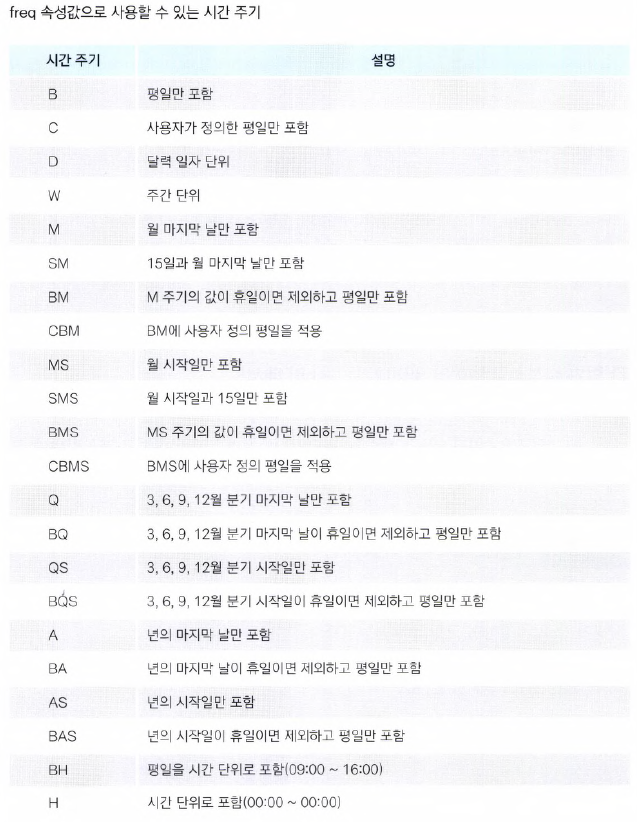

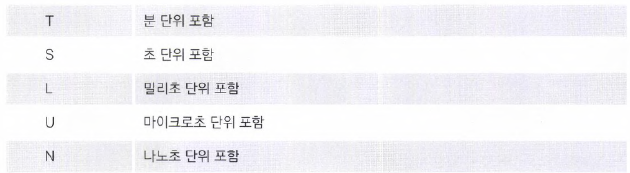